# Separating Time Series Components

In this section, you will use different libraries in Python to learn about different components of a time series. Before you make time series forecasts, it is important to first identify different components of a time series. This is because each component of a time series needs to be dealt with and analysed differently. 

To understand these better, let’s look at the month-wise data for exchange rates, starting from year 1970 till year 1985. First you need to load the .csv file into Python. Run the commands below.

In [1]:
# Importing required Python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the data set from csv file into dataframe 'df1'
# Keep the dataset in the same location as the notebook file. 
# If not, then specify the correct address whille loading the file.

df1 = pd.read_csv("exchange-rate-twi.csv")
df1.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


As you can see, the dataset includes two columns, 'Month' and 'Exchange Rate TWI'. This will form the basis for our timeseries. Now, you need to check whether there is any 'trend', 'seasonality' or 'cyclicity' in the data. This can be done by simply plotting the time series data across the months.

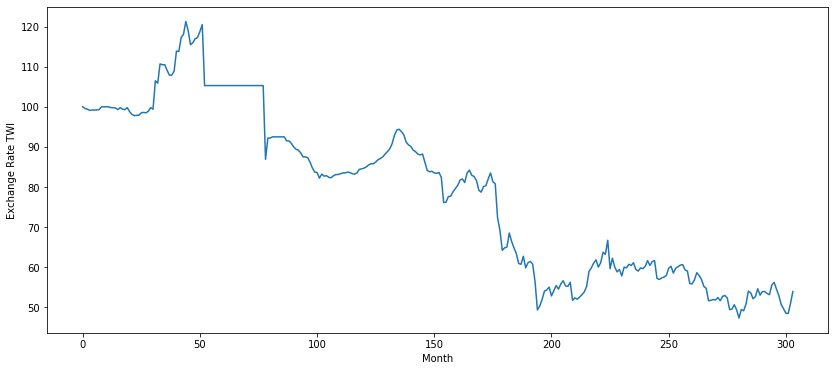

In [3]:
# Plotting the time series

plt.figure(figsize=(14, 6))

plt.plot(df1.iloc[:,1])

plt.xlabel('Month')
plt.ylabel('Exchange Rate TWI')
plt.show()

After seeing the plot above, it can be concluded that the exchange rate is showing a downward trend. There is no seasonality present in the series. Hence, we can try to fit a linear model on the dataset showing the decreasing trend.

You will be using the **statsmodel** package available in Python. Statsmodel library is extensively used in exploring data, estimating statistical models and performing different test statistics. It is one of the most used libraries in the domain of descriptive and inferential statistics. Here, you can fit a regression line over the exchange rate dataset using this package.

In [4]:
#Creating a linear model fitting over the exchange rate dataset

import statsmodels.api as sm

# Creating variables 'x' and 'y' for model estimation
x = df1.iloc[:,0] # First column contains the month number
y = df1.iloc[:,1] # Second column has the Exchange rate 

# Add a constant to get an intercept
# Do not forget this step otherwise the line will pass through origin
x_sm = sm.add_constant(x)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y, x_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    111.820108
Month     -0.217835
dtype: float64

**Note**: Here, you can notice that a constant has been added before fitting the linear model. That is necessary to do as you would want to estimate the intercept as well (y = mx + c). In case you don't add the constant, Python will provide a function crossing through origin (y = mx).

The"lr" model prepared from the series is **y = 111.82 - 0.22 * x**. You can try to visualize both, the time series and the linear trend using the code below. It can be seen that the trend appropriately fits the time series.

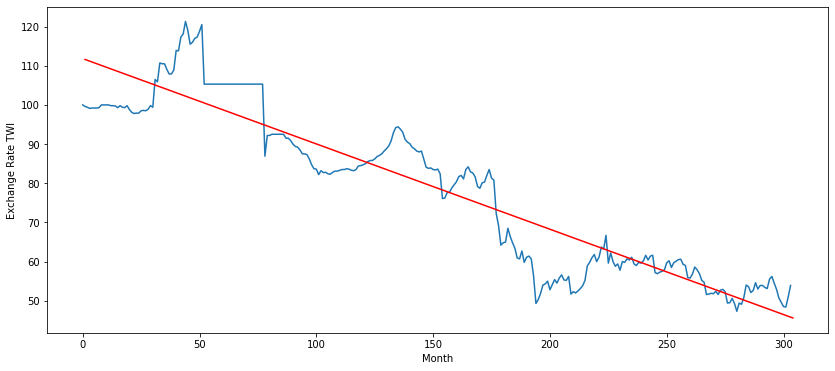

In [5]:
#plotting the series and fitted regression line

plt.figure(figsize=(14, 6))

plt.plot(df1.iloc[:,1])
plt.plot(x, lr.params[0] + lr.params[1] * x, 'r')

plt.xlabel('Month')
plt.ylabel('Exchange Rate TWI')
plt.show()

The red line here, the one that shows the regression fit, gives the overall pattern of the data. So overall, you expect the exchange rate to go down every year. Hence, this red line is indicative of the overall pattern of the data, or in other words, the **global pattern**. 

However, if you remove this global pattern, you will come across a lot of wiggles in the data, on top of the simple regression fit. Let’s plot these wiggles, the ones that would be left after removing the regression fit.

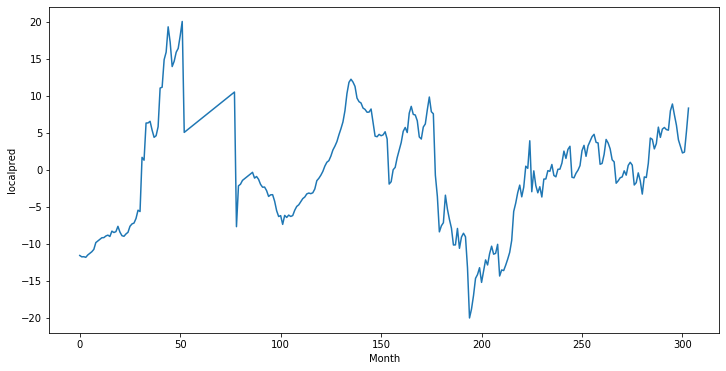

In [6]:
# Storing the predicted values obtained from the linear regression model
globalpred = lr.predict(x_sm)

# plotting the series after removing the global pattern

plt.figure(figsize=(12, 6))

localpred = (y - globalpred)
plt.plot(localpred)
           
plt.xlabel('Month')
plt.ylabel('localpred')
plt.show()

You can notice a non-uniform curve after removing the global pattern from the series. In a time series, you model this part of the data as well. This is the locally predictable part of the time series, or in other words, the **local pattern** in the time series. It is called local because the values here don’t show any long-term pattern. The values don’t increase regularly or repeat with a set frequency; so there is no overall global pattern. However, locally, there is some predictability: the value of the wiggle today depends somewhat on what the value of the wiggle was yesterday.

However, you can never fit an exact model on the local component on a time series. There can be interferences from various sources which may pull down or push the values up from our predicted values. Hence, there is a noise component included in the time series. In short, there are three main components of a time series: **global**, **local** and **noise**. 

Following are the components of a time series:

![alt text](components_of_timeseries.png "Components of Time Series")

You have the globally predictable part and the locally predictable part. You also have the unpredictable part, which is something you cannot predict.

As a part of the practice exercise, you can estimate the value of 'localpred' for timestamp 300 using the code below.

In [7]:
localpred[299]

3.130277146567117

Hence, the answer obtained is **3.13**.